In [23]:
import pandas as pd
import tensorflow as tf
import utils

preprocess_input_nasnet = tf.keras.applications.nasnet.preprocess_input
preprocess_input_resnet = tf.keras.applications.resnet.preprocess_input
preprocess_input_xception = tf.keras.applications.xception.preprocess_input
preprocess_input_effb7 = tf.keras.applications.efficientnet.preprocess_input
preprocess_input_inceptionresnetv2 = tf.keras.applications.inception_resnet_v2.preprocess_input
preprocess_input_mobilenetv2 = tf.keras.applications.mobilenet_v2.preprocess_input
preprocess_input_mobilenetv3L = tf.keras.applications.mobilenet_v3.preprocess_input
preprocess_input_resnetrs = tf.keras.applications.resnet_rs.preprocess_input

In [65]:
fundus_train = "/home/thefilthysalad/PycharmProjects/eye_detection_fundus_dataset/Dataset/split1/train"
fundus_test = "/home/thefilthysalad/PycharmProjects/eye_detection_fundus_dataset/Dataset/split1/test"


BATCH_SIZE = 32
IMG_HEIGHT, IMG_WIDTH = 224,224
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    fundus_test,
    labels='inferred',
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=False,
    seed=123,
)
IMG_HEIGHT_x, IMG_WIDTH_x = 299,299
test_dataset_xception = tf.keras.preprocessing.image_dataset_from_directory(
    fundus_test,
    labels='inferred',
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT_x, IMG_WIDTH_x),
    shuffle=False,
    seed=123,
)
IMG_HEIGHT_mobilenet, IMG_WIDTH_mobilenet = 512,512
test_dataset_mobilenet = tf.keras.preprocessing.image_dataset_from_directory(
    fundus_test,
    labels='inferred',
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT_mobilenet, IMG_WIDTH_mobilenet),
    shuffle=False,
    seed=123,
)

Found 845 files belonging to 4 classes.
Found 845 files belonging to 4 classes.
Found 845 files belonging to 4 classes.


In [66]:
test_datagen_nasnet = test_dataset.map(lambda x, y: (preprocess_input_nasnet(x), y))
test_datagen_resnet = test_dataset.map(lambda x, y: (preprocess_input_resnet(x), y))
test_datagen_xception = test_dataset_xception.map(lambda x, y: (preprocess_input_xception(x), y))
test_datagen_effb7 = test_dataset.map(lambda x, y: (preprocess_input_effb7(x), y))
test_datagen_inceptionresnetv2 = test_dataset_xception.map(lambda x, y: (preprocess_input_inceptionresnetv2(x), y))
test_datagen_mobilenetv2 = test_dataset_mobilenet.map(lambda x, y: (preprocess_input_mobilenetv2(x), y))
test_datagen_mobilenetv3L = test_dataset.map(lambda x, y: (preprocess_input_mobilenetv3L(x), y))
test_datagen_resnetrs = test_dataset.map(lambda x, y: (preprocess_input_resnetrs(x), y))


In [48]:
true_y_labels = []
for images, labels in test_datagen_nasnet.unbatch():
    true_y_labels.append(labels.numpy().argmax())

In [30]:
nasnet_mobile =  tf.keras.models.load_model("/home/thefilthysalad/PycharmProjects/eye_detection_fundus_dataset/ML_Models/Trained_Models/Nasnet_88.99")
nasnet_mobile.evaluate(test_datagen_nasnet)

In [50]:
nasnet_preds = nasnet_mobile.predict(test_datagen_nasnet)
nasnet_preds = nasnet_preds.argmax(axis=1)

27/27 [==============================] - 1s 31ms/step


array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [51]:
nasnet_preds = pd.DataFrame(nasnet_preds)

In [35]:
effb7_mobile =  tf.keras.models.load_model("/home/thefilthysalad/PycharmProjects/eye_detection_fundus_dataset/ML_Models/Trained_Models/CompletedModels/EfficientB7_90.49")
effb7_mobile.evaluate(test_datagen_effb7)

27/27 [==============================] - 6s 132ms/step - loss: 0.3847 - accuracy: 0.9041


[0.3847275972366333, 0.9041420221328735]

In [54]:
effb7_preds = effb7_mobile.predict(test_datagen_effb7)
effb7_preds = pd.DataFrame(effb7_preds.argmax(axis=1))

27/27 [==============================] - 3s 128ms/step


In [58]:
inception_resnet_v2 =  tf.keras.models.load_model("/home/thefilthysalad/PycharmProjects/eye_detection_fundus_dataset/ML_Models/Trained_Models/CompletedModels/InceptionResnetV2_90.65")
inception_resnet_v2.evaluate(test_datagen_inceptionresnetv2)

27/27 [==============================] - 5s 98ms/step - loss: 0.4096 - accuracy: 0.9065


[0.4095657169818878, 0.9065088629722595]

In [59]:
inception_resnet_v2_preds = pd.DataFrame(inception_resnet_v2.predict(test_datagen_inceptionresnetv2).argmax(axis=1))

27/27 [==============================] - 3s 76ms/step


In [67]:
mobilenetV2 =  tf.keras.models.load_model("/home/thefilthysalad/PycharmProjects/eye_detection_fundus_dataset/ML_Models/Trained_Models/CompletedModels/Mobilenetv2_88")
mobilenetV2.evaluate(test_datagen_mobilenetv2)

27/27 [==============================] - 4s 97ms/step - loss: 0.3032 - accuracy: 0.8793


[0.3031553030014038, 0.8792899250984192]

In [68]:
mobilenetV2_preds = pd.DataFrame(mobilenetV2.predict(test_datagen_mobilenetv2).argmax(axis=1))

27/27 [==============================] - 3s 91ms/step


In [69]:
mobilenet_v3L =  tf.keras.models.load_model("/home/thefilthysalad/PycharmProjects/eye_detection_fundus_dataset/ML_Models/Trained_Models/CompletedModels/MobilenetV3L_87.7")
mobilenet_v3L.evaluate(test_datagen_mobilenetv3L)

27/27 [==============================] - 1s 23ms/step - loss: 0.3689 - accuracy: 0.8769


[0.36894628405570984, 0.8769230842590332]

In [70]:
mobilenetV3L_preds = pd.DataFrame(mobilenet_v3L.predict(test_datagen_mobilenetv3L).argmax(axis=1))

27/27 [==============================] - 1s 16ms/step


In [71]:
resnet50 =  tf.keras.models.load_model("/home/thefilthysalad/PycharmProjects/eye_detection_fundus_dataset/ML_Models/Trained_Models/CompletedModels/Resnet_50_90")
resnet152 =  tf.keras.models.load_model("/home/thefilthysalad/PycharmProjects/eye_detection_fundus_dataset/ML_Models/Trained_Models/CompletedModels/Resnet_152_88")
resnet_rs =  tf.keras.models.load_model("/home/thefilthysalad/PycharmProjects/eye_detection_fundus_dataset/ML_Models/Trained_Models/CompletedModels/Resnet_rs_101_87")
xception =  tf.keras.models.load_model("/home/thefilthysalad/PycharmProjects/eye_detection_fundus_dataset/ML_Models/Trained_Models/CompletedModels/Xception_new_90.41")


In [72]:
resnet50_preds = pd.DataFrame(resnet50.predict(test_datagen_resnet).argmax(axis=1))
resnet152_preds = pd.DataFrame(resnet152.predict(test_datagen_resnet).argmax(axis=1))
resnet_rs_preds = pd.DataFrame(resnet_rs.predict(test_datagen_resnetrs).argmax(axis=1))
xception_preds = pd.DataFrame(xception.predict(test_datagen_xception).argmax(axis=1))

27/27 [==============================] - 3s 75ms/step


In [82]:
all_model_results = pd.DataFrame()
all_model_results["Efficient_Net_B7"] = effb7_preds
all_model_results["Inception_Resnet_V2"] = inception_resnet_v2_preds
all_model_results["Mobilenet_V2"] = mobilenetV2_preds
all_model_results["Mobilenet_V3_Large"] = mobilenetV3L_preds
all_model_results["Inception_Resnet50"] = resnet50_preds
all_model_results["Inception_Resnet152"] = resnet152_preds
all_model_results["Inception_ResnetRs"] = resnet_rs_preds
all_model_results["XceptionNet"] = xception_preds
all_model_results["NasnetMobile"] = nasnet_preds
all_model_results

,Efficient_Net_B7,Inception_Resnet_V2,Mobilenet_V2,Mobilenet_V3_Large,Inception_Resnet50,Inception_Resnet152,Inception_ResnetRs,XceptionNet,NasnetMobile
0,0,3,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0
2,3,3,3,3,3,3,3,0,3
3,0,0,0,0,0,0,0,0,0
4,3,2,3,3,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
840,3,3,3,3,3,3,3,0,3
841,3,3,3,3,3,3,3,0,3
842,3,3,3,3,3,3,3,0,3
843,3,3,3,3,3,3,3,0,2


In [83]:
all_model_results["True_Preds"] = pd.DataFrame(true_y_labels)
all_model_results

,Efficient_Net_B7,Inception_Resnet_V2,Mobilenet_V2,Mobilenet_V3_Large,Inception_Resnet50,Inception_Resnet152,Inception_ResnetRs,XceptionNet,NasnetMobile,True_Preds
0,0,3,0,0,0,0,0,0,3,0
1,0,0,0,0,0,0,0,0,0,0
2,3,3,3,3,3,3,3,0,3,0
3,0,0,0,0,0,0,0,0,0,0
4,3,2,3,3,3,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...
840,3,3,3,3,3,3,3,0,3,3
841,3,3,3,3,3,3,3,0,3,3
842,3,3,3,3,3,3,3,0,3,3
843,3,3,3,3,3,3,3,0,2,3


In [84]:
all_model_results_copy = all_model_results.copy()
all_model_results_copy['max_count']= all_model_results.apply(lambda row: row.mode().iloc[0], axis=1)
all_model_results_copy

,Efficient_Net_B7,Inception_Resnet_V2,Mobilenet_V2,Mobilenet_V3_Large,Inception_Resnet50,Inception_Resnet152,Inception_ResnetRs,XceptionNet,NasnetMobile,True_Preds,max_count
0,0,3,0,0,0,0,0,0,3,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,3,3,3,3,3,3,3,0,3,0,3
3,0,0,0,0,0,0,0,0,0,0,0
4,3,2,3,3,3,0,0,0,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...
840,3,3,3,3,3,3,3,0,3,3,3
841,3,3,3,3,3,3,3,0,3,3,3
842,3,3,3,3,3,3,3,0,3,3,3
843,3,3,3,3,3,3,3,0,2,3,3


In [85]:
accuracy = (all_model_results_copy["True_Preds"] == all_model_results_copy["max_count"]).sum()/845

In [86]:
accuracy

0.9289940828402367

In [92]:
import utils

utils.confusion_matrix(all_model_results_copy["True_Preds"], all_model_results_copy["max_count"])

array([[197,   0,   5,   6],
       [  0, 220,   0,   0],
       [ 10,   0, 163,  29],
       [  4,   0,   6, 205]])

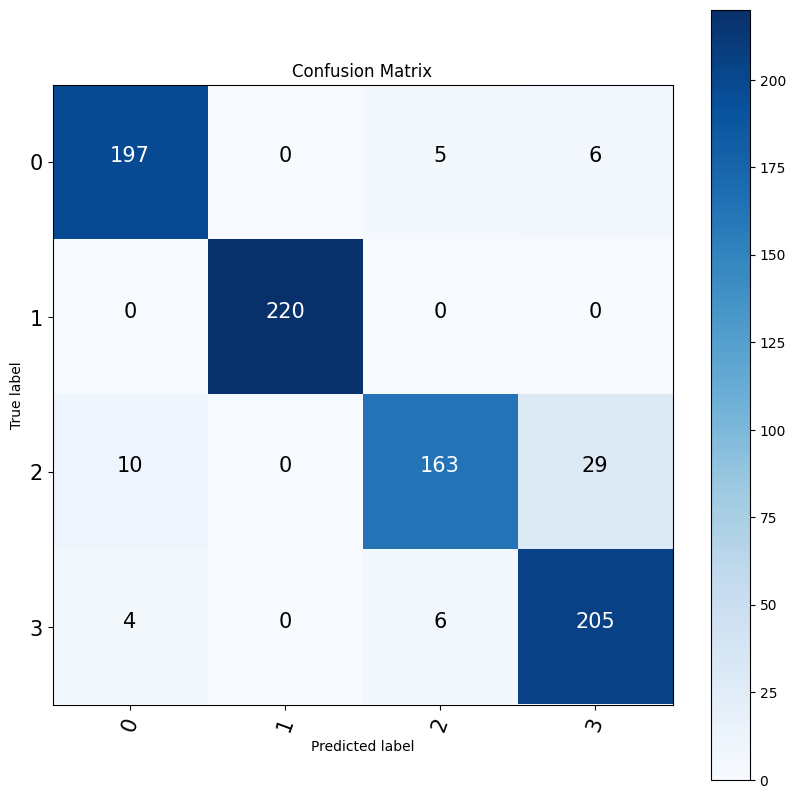

In [93]:
utils.make_confusion_matrix(all_model_results_copy["True_Preds"], all_model_results_copy["max_count"])

In [94]:
utils.calc_evaluation_metrics(all_model_results_copy["True_Preds"], all_model_results_copy["max_count"])

{'Accuracy': 92.89940828402366,
 'Precision': 0.9314494325721965,
 'Recall': 0.9314494325721965,
 'F1-Score': 0.9283598348109902}